<a id='1'></a>
## Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

import warnings
warnings.filterwarnings('ignore')

import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import time

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162991 sha256=be4708d43fd9c29d56854758c100d1081281a7b5d40db307b034cf8b4e89212c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
rating = pd.read_csv('/content/rating.csv',encoding='cp1252')
anime = pd.read_csv('/content/anime.csv',encoding='cp1252')


In [ ]:
anime.head(6)

,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,fullmetal alchemist brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,steinsgate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,haikyuu karasuno koukou vs shiratorizawa gakue...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


In [ ]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
anime.dropna(subset=['genre','type','rating'],inplace=True)

Text(0, 0.5, 'Frequency')

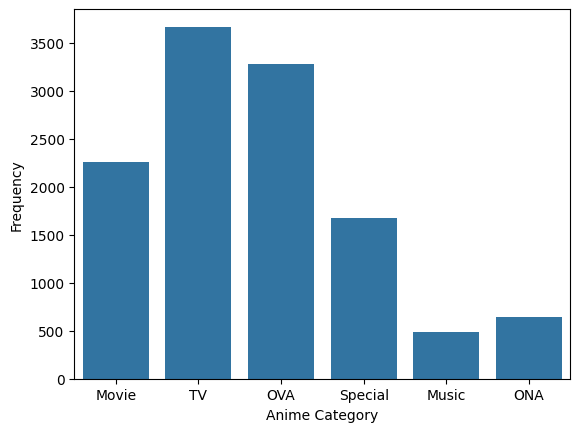

In [ ]:
sns.countplot(data=anime,x='type')
plt.xlabel("Anime Category")
plt.ylabel('Frequency')

In [ ]:
#anime.head()
#anime["name"].dtype
#anime["name"] = pd.to_numeric(anime["name"])
#plt.matshow(anime.corr())
#plt.xlabel("anime_id")
#plt.ylabel("type")
#plt.show()

Text(-3.6805555555555554, 0.5, 'Total')

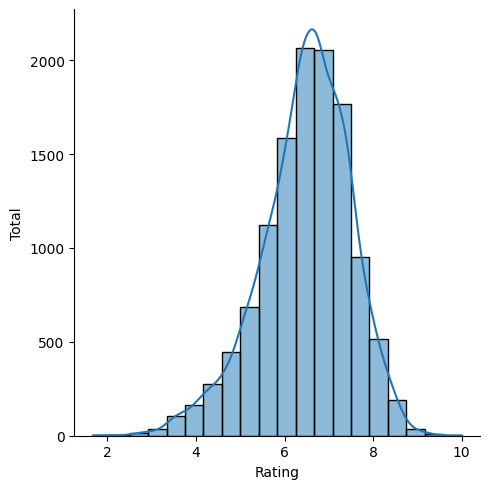

In [ ]:
sns.displot(data=anime, x='rating',kde=True,bins=20)
plt.xlabel('Rating')
plt.ylabel('Total')

Text(0, 0.5, 'Type')

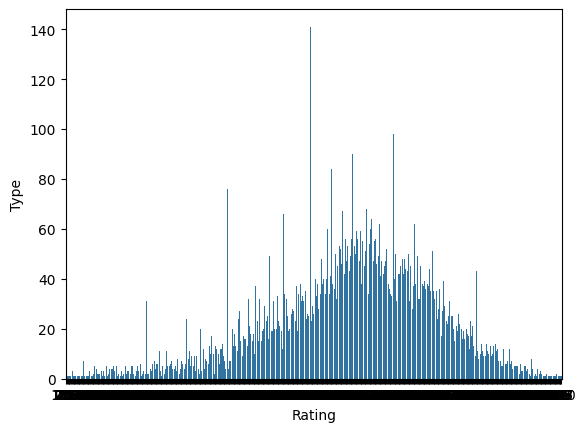

In [ ]:
sns.countplot(data=anime,x='rating')
plt.xlabel("Rating")
plt.ylabel('Type')

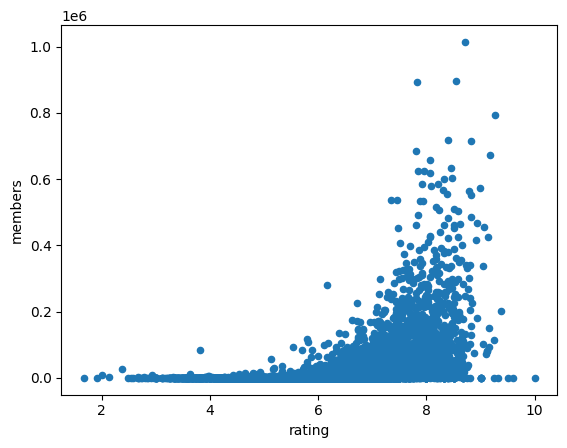

In [ ]:
anime.plot(kind = 'scatter', x = 'rating', y = 'members')

plt.show()

Text(0, 0.5, 'user_id')

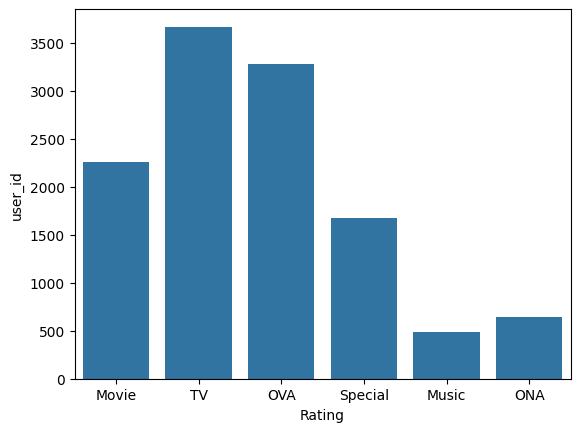

In [ ]:
sns.countplot(data=anime,x='type')
plt.xlabel("Rating")
plt.ylabel('user_id')

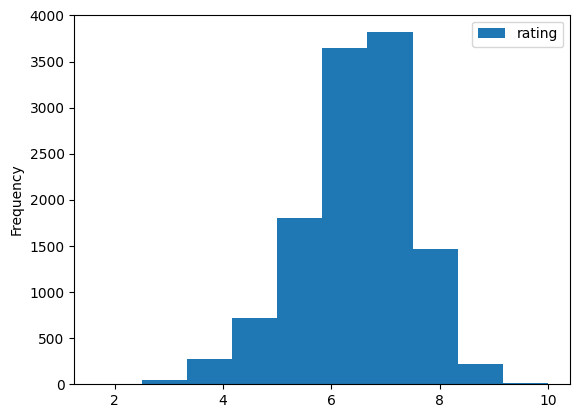

In [ ]:
anime.plot(kind = 'hist', x = 'anime_id', y = 'rating')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# Classifications using LogisticRegression and Decision Trees in ML.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import scipy as sp
import re

In [ ]:
X = anime[['rating']]
y = anime['members']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
X = anime[['rating']]
y = anime['members']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2561638501.3982134


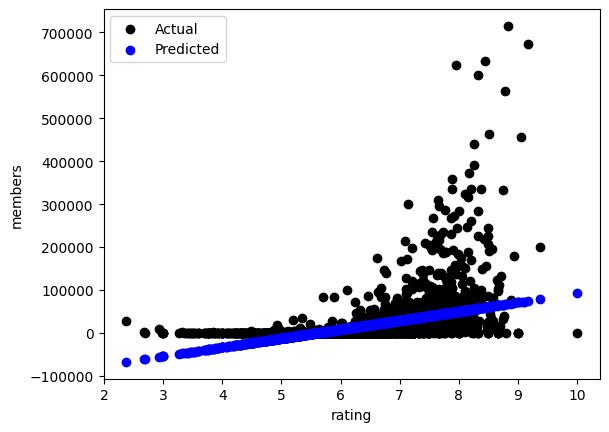

In [ ]:
plt.scatter(X_test['rating'], y_test, color='black', label='Actual')
plt.scatter(X_test['rating'], y_pred, color='blue', label='Predicted')
plt.xlabel('rating')
plt.ylabel('members')
plt.legend()
plt.show()


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2483817579.2263284


In [ ]:
model = GaussianNB()  # For continuous features
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.0008319467554076539
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         4
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00       

In [ ]:
degree = 2  # Choose the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2246212604.5493526


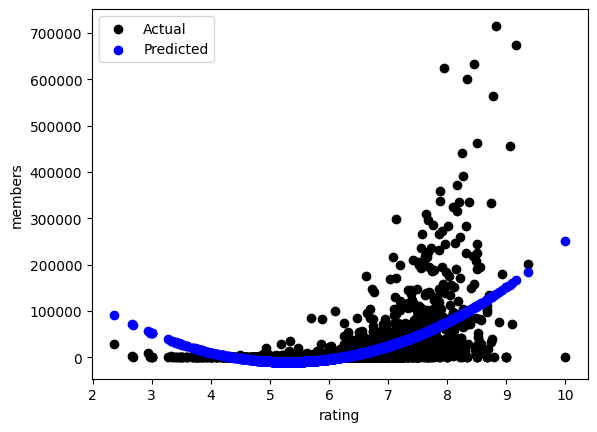

In [ ]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('rating')
plt.ylabel('members')
plt.legend()
plt.show()


In [ ]:
X = anime[['anime_id']]
y = anime['members']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
anime.info()
anime

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1009.1+ KB


,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,fullmetal alchemist brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,steinsgate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,toushindai my lover minami tai mechaminami,Hentai,OVA,1,4.15,211
12290,5543,under world,Hentai,OVA,1,4.28,183
12291,5621,violence gekiga david no hoshi,Hentai,OVA,4,4.88,219
12292,6133,violence gekiga shin david no hoshi inma densetsu,Hentai,OVA,1,4.98,175


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3018411250.860293


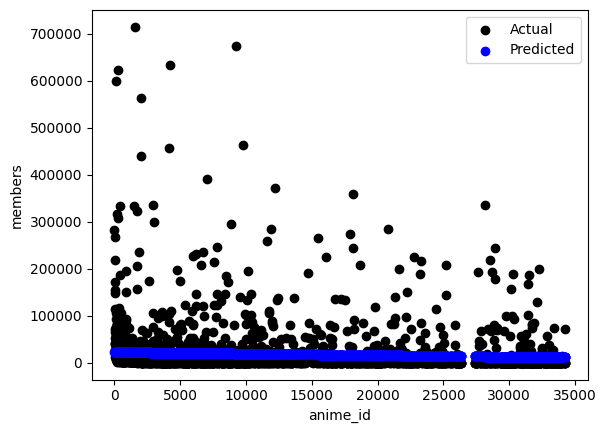

In [ ]:
plt.scatter(X_test['anime_id'], y_test, color='black', label='Actual')
plt.scatter(X_test['anime_id'], y_pred, color='blue', label='Predicted')
plt.xlabel('anime_id')
plt.ylabel('members')
plt.legend()
plt.show()


In [ ]:
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,fullmetal alchemist brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,steinsgate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,haikyuu karasuno koukou vs shiratorizawa gakue...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,hunter x hunter 2011,"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,ginga eiyuu densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,gintama movie kanketsuhen yorozuya yo eien nare,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,gintama enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [ ]:
rating = pd.DataFrame(rating)
rating.info()
rating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float64
dtypes: float64(1)
memory usage: 200.0 bytes


,0
0,7.93
1,7.76
2,6.38
3,6.69
4,6.24
5,6.76
6,6.28
7,7.48
8,6.97


In [ ]:
#rating['rating'].dtype
#rating['rating'] = pd.to_numeric(rating['rating'])
#rating['rating'] = rating['rating'].apply(lambda x: np.nan if x==-1 else x)

In [ ]:
rating.head()

,0
0,7.93
1,7.76
2,6.38
3,6.69
4,6.24


<a id='2'></a>
## Load Data



```
# This is formatted as code
```

<a id='3'></a>
## Data Summary

In [ ]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0


In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime[anime.name=='pokemon']

,anime_id,name,genre,type,episodes,rating,members


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
print(f'anime shape: {anime.shape}\nrating shape: {rating.shape}')

anime shape: (12294, 7)
rating shape: (1101254, 3)


<a id='4'></a>
#### Check Missing Values

In [ ]:
rating.isna().sum()

user_id     0
anime_id    0
rating      1
dtype: int64

In [ ]:

anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

# <a id='5'></a>
#### Remove Missing Rows

In [ ]:
anime.dropna(axis = 0, inplace = True)
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
anime.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [ ]:
anime.episodes.value_counts()

episodes
1      5571
2      1075
12      810
13      571
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

<a id='6'></a>
#### Check Duplicates

In [ ]:
duplicated_anime = anime[anime.duplicated()].shape[0]
print(f'count of duplicated anime: {duplicated_anime}')

count of duplicated anime: 0


In [ ]:
duplicated_rating = rating[rating.duplicated()].shape[0]
print(f'count of duplicated anime: {duplicated_rating}')

count of duplicated anime: 0


<a id='7'></a>
#### Remove Duplicates

In [ ]:
rating.drop_duplicates(keep='first',inplace=True)

duplicated_rating = rating[rating.duplicated()].shape[0]
print(f'count of duplicated anime after removing: {duplicated_rating}')

count of duplicated anime after removing: 0


<a id='8'></a>
## Create Dataset

In [ ]:
df = pd.merge(anime,rating,on="anime_id")

In [ ]:
df.tail()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
1101235,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779,6268,-1.0
1101236,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779,7997,-1.0
1101237,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779,10322,-1.0
1101238,5569,Tsui no Sora,Hentai,OVA,1,2.98,934,5204,1.0
1101239,17823,Ikenai Boy,"Comedy, Harem, Hentai",OVA,1,3.56,179,5831,-1.0


In [ ]:
df = df.rename(columns={"rating_x": "user_rating"})
df = df.drop('rating_y', axis=1)

In [ ]:
df.tail()

,anime_id,name,genre,type,episodes,user_rating,members,user_id
1101235,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779,6268
1101236,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779,7997
1101237,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779,10322
1101238,5569,Tsui no Sora,Hentai,OVA,1,2.98,934,5204
1101239,17823,Ikenai Boy,"Comedy, Harem, Hentai",OVA,1,3.56,179,5831


In [ ]:
df.describe()

,anime_id,user_rating,members,user_id
count,1.101240e+06,1.101240e+06,1.101240e+06,1.101240e+06
mean,8.795749e+03,7.651568e+00,1.775160e+05,5.280405e+03
std,9.013166e+03,6.703220e-01,1.886965e+05,2.906986e+03
min,1.000000e+00,2.000000e+00,4.300000e+01,1.000000e+00
25%,1.118000e+03,7.260000e+00,4.292700e+04,2.853000e+03
50%,5.675000e+03,7.680000e+00,1.080110e+05,5.491000e+03
75%,1.422700e+04,8.130000e+00,2.434480e+05,7.596000e+03
max,3.432500e+04,9.370000e+00,1.013917e+06,1.056000e+04


In [ ]:
#df = df.head(500000).copy()

<a id='9'></a>
## Preprocessing Function

In [ ]:
df = df.copy()
df["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
df = df.dropna(axis = 0)
print("Null values after final pre-processing :")
df.isna().sum()

Null values after final pre-processing :


anime_id       0
name           0
genre          0
type           0
episodes       0
user_rating    0
members        0
user_id        0
dtype: int64

In [ ]:
def lower_text(text):
    """
        to lowercase
    """
    text = text.lower()
    return text

In [ ]:
def clean_text(text):
    """
        data preprocessing
    """

    # to lowercase
    text = text.lower()

    # remove sybmols and other words
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # remove number
    #text = re.sub(r'\d+', '', text)

    # tokenization
    #words = word_tokenize(text)

    # remove stopwords
    #stop_words = set(stopwords.words('english'))
    #words = [word for word in words if word not in stop_words]

    # stemming
    #stemmer = PorterStemmer()
    #words = [stemmer.stem(word) for word in words]

    # join words
    #text = ' '.join(words)

    return text

<a id='10'></a>
## Data Preprocessing

In [ ]:
start_time = time.time()
df['name']=df['name'].apply(clean_text)
anime['name'] = anime['name'].apply(clean_text)
end_time = time.time()
elapsed_time = end_time - start_time
print("process time: ", elapsed_time, " sec.")

process time:  12.378189325332642  sec.


<a id='11'></a>
## Popularity-Based Recommender

In [ ]:
def popularity_recommender(df, selected_features):
    """
        recommender system with popularity-based
    """
    # grouping & calculating mean value
    grouped_df = df.groupby(selected_features).agg({'user_rating': 'mean'}).reset_index()
    # sorting to rating
    sorted_df = grouped_df.sort_values('user_rating', ascending=False)
    # give the recommedations
    recommendations = sorted_df.head(10)
    return recommendations

In [ ]:
df.columns


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'user_rating',
       'members', 'user_id'],
      dtype='object')

In [ ]:
# according to anime names
selected_features = ['name']
popularity_recommender(df, selected_features)

,name,user_rating
3748,kimi no na wa,9.370000
2044,fullmetal alchemist brotherhood,9.260000
2370,gintama°,9.250000
7003,steinsgate,9.170000
2568,haikyuu karasuno koukou vs shiratorizawa gakue...,9.150000
3021,hunter x hunter 2011,9.130000
2326,ginga eiyuu densetsu,9.110000
2360,gintama enchousen,9.110000
2363,gintama movie kanketsuhen yorozuya yo eien nare,9.100000
2358,gintama,9.091155


In [ ]:
# according to members
selected_features = ['members']
popularity_recommender(df, selected_features)

,members,user_rating
6149,200630,9.37
6360,793665,9.26
5897,114262,9.25
6356,673572,9.17
6033,151266,9.16
5761,93351,9.15
6321,425855,9.13
5642,80679,9.11
5650,81109,9.11
5562,72534,9.10


In [ ]:
# create first genre
df['first_genre'] = df['genre'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x)
# according to genre
selected_features = ['first_genre']
popularity_recommender(df, selected_features)

,first_genre,user_rating
14,Josei,8.467415
28,Sci-Fi,8.321880
24,Psychological,8.230227
21,Mystery,8.209897
4,Dementia,7.879918
6,Drama,7.777481
9,Game,7.739996
0,Action,7.718440
2,Cars,7.682381
1,Adventure,7.665852


In [ ]:
#according to type
selected_features = ['type']
popularity_recommender(df, selected_features)

,type,user_rating
0,Movie,7.802081
5,TV,7.736950
4,Special,7.330657
3,OVA,7.204047
1,Music,7.098590
2,ONA,7.076154


<a id='12'></a>
## Clustering and Collaborative Recommender

In [ ]:
#encoding
le = LabelEncoder()
df['t_genre']= le.fit_transform(df['genre'])
df['t_type']= le.fit_transform(df['type'])


In [ ]:
selected_features = ['anime_id','t_genre','t_type', 'user_rating']

# k-means model
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[selected_features])


In [ ]:
from collections import Counter

labels = kmeans.labels_

# count of cluster items
cluster_counts = Counter(labels)

for cluster_id, count in cluster_counts.items():
    print(f" {cluster_id}. Cluster: {count} element")


 4. Cluster: 75502 element
 5. Cluster: 201486 element
 3. Cluster: 173056 element
 0. Cluster: 434447 element
 1. Cluster: 116430 element
 2. Cluster: 100319 element


In [ ]:
len(df)


1101240

In [ ]:
import random

# create random user id
const_member_index = random.randint(1, len(df))
const_cluster_no = df.cluster[const_member_index]
const_cluster_no


0

In [ ]:
user_no = df.user_id[const_member_index]



*   Random Recommendation of Anime based on anime id.                            

*   This will give recommendations for the randomly selected animes based on similarity with other users.



In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

start_time = time.time()

# get clusters and set pivot table
df_pivot = df[df.cluster == const_cluster_no].pivot_table(index="name", columns="user_id", values="user_rating").fillna(0)

# collaborative filtering method (KNN)
df_matrix = csr_matrix(df_pivot.values)
model_knn = NearestNeighbors(metric="cosine", algorithm="brute")
model_knn.fit(df_matrix)

# random anime title and finding recommendation
query_no = np.random.choice(df_pivot.shape[0])
print(f"We will find recommendation for {query_no} no anime which is {df_pivot.index[query_no]}.")
anime_const = df_pivot.index[query_no]

distances, indices = model_knn.kneighbors(df_pivot.iloc[query_no, :].values.reshape(1, -1), n_neighbors=10)

no = []
name = []
distance = []
rating = []
genre = []

# create recommadation
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for '{df_pivot.index[query_no]}' viewers :\n")
    else:
        no.append(i)
        name.append(df_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"] == df_pivot.index[indices.flatten()[i]]]["rating"].values)
        genre.append(*anime[anime["name"] == df_pivot.index[indices.flatten()[i]]]["genre"].values)

        #print(f'distance: {distance}')
dic = {"No": no, "Anime Name": name, "Rating": rating, "Genre": genre, "Similarity": distance[::-1]}
recommendation = pd.DataFrame(data=dic)
recommendation.set_index("No", inplace=True)

end_time = time.time()
elapsed_time = end_time - start_time
print("process time: ", elapsed_time, " sec.")

recommendation.head(10)

We will find recommendation for 1488 no anime which is lupin iii part iii.
Recommendations for 'lupin iii part iii' viewers :

process time:  2.9115216732025146  sec.


,Anime Name,Rating,Genre,Similarity
No,,,,
1,lupin iii part ii,7.93,"Action, Adventure, Comedy, Shounen",0.825036
2,lupin iii,7.76,"Action, Adventure, Comedy, Shounen",0.823002
3,obake no qtarou,6.38,"Comedy, School, Slice of Life, Supernatural",0.809524
4,susiechan to marvy,6.69,"Comedy, Kids",0.781782
5,oishinbo,6.24,"Comedy, Seinen, Slice of Life",0.781782
6,warau salesman,6.76,"Comedy, Drama, Seinen",0.781782
7,lupin iii ikiteita majutsushi,6.28,"Adventure, Comedy, Shounen",0.781782
8,lupin iii kutabare nostradamus,7.48,"Action, Adventure, Comedy, Shounen",0.659201
9,lupin iii napoleon no jisho wo ubae,6.97,"Action, Adventure, Comedy, Shounen",0.318402


Recommendations based on the user's Input.

In [ ]:
# Provide the name of the anime you want recommendations for
#anime_name_input = "lupin iii"

# Find the index of the provided anime name in df_pivot
#query_index = df_pivot.index.get_loc(anime_name_input)

# Find recommendations for the provided anime
#distances, indices = model_knn.kneighbors(df_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=10)

#no = []
#name = []
#distance = []
#rating = []
#genre = []

# Create recommendations
#for i in range(0, len(distances.flatten())):
#    if i == 0:
#        print(f"Recommendations for '{anime_name_input}' viewers :\n")
#    else:
#        no.append(i)
#        name.append(df_pivot.index[indices.flatten()[i]])
#        distance.append(distances.flatten()[i])
#        rating.append(*anime[anime["name"] == df_pivot.index[indices.flatten()[i]]]["rating"].values)
#        genre.append(*anime[anime["name"] == df_pivot.index[indices.flatten()[i]]]["genre"].values)

# Create a DataFrame for recommendations
#dic = {"No": no, "Anime Name": name, "Rating": rating, "Genre": genre, "Similarity": distance[::-1]}
#recommendation = pd.DataFrame(data=dic)
#recommendation.set_index("No", inplace=True)

# Print the recommendations
#print(recommendation)



<a id='13'></a>
## Clustering and Content-Based Recommender

In [ ]:
# create vectorizer
tfv = TfidfVectorizer(analyzer="word")

# get clusters
rec_data = df[df.cluster == const_cluster_no].copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)

# evaluate to genre
genres = rec_data["name"].str.split(", | , | ,").astype(str)

#create tf-idf matrix
tfv_matrix = tfv.fit_transform(genres)

# calculate similarity matrix
cos_sim = cosine_similarity(tfv_matrix, tfv_matrix)

# drop duplicates
rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()

# recommendation function
def give_recommendation(title, cos_sim=cos_sim):
    idx = rec_indices[title]
    cos_scores = list(enumerate(cos_sim[idx]))
    cos_scores = sorted(cos_scores, key=lambda x: x[1], reverse=True)
    cos_scores = cos_scores[1:11]
    anime_indices = [i[0] for i in cos_scores]

    # visualization
    sim_scores = [i[1] for i in cos_scores]
    rec_dic = {
        "No": range(1, 11),
        "Anime Name": anime["name"].iloc[anime_indices].values,
        "Rating": anime["rating"].iloc[anime_indices].values,
        "Genre": anime["genre"].iloc[anime_indices].values,
        "Similarity Score": sim_scores,
    }
    dataframe = pd.DataFrame(data=rec_dic)
    dataframe.set_index("No", inplace=True)

    print(f"Recommendations for '{title}' viewers :\n")

    return dataframe



In [ ]:
               # The Cosine Similarity Matrix
print(cos_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.03727073 0.         0.        ]
 ...
 [0.         0.         0.03727073 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.1693031 ]
 [0.         0.         0.         ... 0.         0.1693031  1.        ]]


In [ ]:
                  # The tf-idf Matrx
print(tfv_matrix)

  (0, 767)	0.4868268264667928
  (0, 897)	0.6554107204760948
  (0, 1173)	0.5774395453355076
  (1, 1177)	1.0
  (2, 2840)	0.4845131630261943
  (2, 2044)	0.43061590195960714
  (2, 2540)	0.15338440198536676
  (2, 1320)	0.43061590195960714
  (2, 1108)	0.43061590195960714
  (2, 604)	0.43061590195960714
  (3, 1722)	0.5400012962969686
  (3, 531)	0.5400012962969686
  (3, 3586)	0.30979302864217484
  (3, 3113)	0.5400012962969686
  (3, 2540)	0.1709505173946233
  (4, 2044)	0.4922539924534364
  (4, 2540)	0.17533974921451473
  (4, 1320)	0.4922539924534364
  (4, 1108)	0.4922539924534364
  (4, 604)	0.4922539924534364
  (5, 1551)	0.6868867462683671
  (5, 1295)	0.6868867462683671
  (5, 2540)	0.23743040159531315
  (6, 3677)	0.4494905766142461
  (6, 2952)	0.39948922927533165
  :	:
  (2770, 1065)	0.5894052540424641
  (2770, 845)	0.5164873457671357
  (2771, 2498)	0.7349645166631422
  (2771, 3806)	0.636939111335797
  (2771, 2540)	0.23267085699949405
  (2772, 1838)	1.0
  (2773, 2271)	0.5609072483830146
  (2773,

Recommending similar anime based on similar genre randomly.

In [ ]:
start_time = time.time()
clustering_and_content = give_recommendation(anime_const)

end_time = time.time()
elapsed_time = end_time - start_time
print("process time: ", elapsed_time, " sec.")

clustering_and_content

Recommendations for 'lupin iii part iii' viewers :

process time:  0.0041217803955078125  sec.


,Anime Name,Rating,Genre,Similarity Score
No,,,,
1,one piece film gold,8.32,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",0.842053
2,love live the school idol movie,8.18,"Music, School, Slice of Life",0.790157
3,huyao xiao hongniang wangquan fugui,7.80,"Comedy, Romance, Supernatural",0.553973
4,kore wa zombie desu ka of the dead ova,7.64,"Action, Comedy, Ecchi, Harem, Magic, Supernatural",0.508640
5,watashi ga motete dousunda,7.64,"Comedy, Harem, Romance, School, Shoujo",0.483675
6,to loveru darkness,7.82,"Comedy, Ecchi, Harem, Romance, School, Sci-Fi,...",0.455483
7,kuroshitsuji picture drama,7.39,"Demons, Supernatural",0.453392
8,dragon ball z special 1 tatta hitori no saishu...,7.75,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",0.445239
9,sword art online ii,7.35,"Action, Adventure, Fantasy, Game, Romance",0.445239


Recommending similar anime based on user preference.

In [ ]:
#anime_title = "nichijou"

#start_time = time.time()
#recommendations = give_recommendation(anime_title)
#end_time = time.time()

#elapsed_time = end_time - start_time
#print("Process time:", elapsed_time, "sec.")

#print(recommendations)


<a id='14'></a>
## SVD Recommender

In [ ]:
user_no = df.user_id[const_member_index]


In [ ]:
user_no


7479

In [ ]:
df.columns


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'user_rating',
       'members', 'user_id', 'first_genre', 't_genre', 't_type', 'cluster'],
      dtype='object')

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

start_time = time.time()

# create a reader
reader = Reader(rating_scale=(1, 10))

# get clusters
df_svd = df.copy()

# create data
data = Dataset.load_from_df(df_svd[['user_id', 'name', 'user_rating']], reader)

# split data
train_set, test_set = train_test_split(data, test_size=.25)

# train SVD model
model = SVD()
model.fit(train_set)

# Test making predictions on the set
predictions = model.test(test_set)

end_time = time.time()
elapsed_time = end_time - start_time
print("process time: ", elapsed_time, " sec.")


process time:  25.715855360031128  sec.


In [ ]:
# performance metrics
accuracy.rmse(predictions)

# give the recommendations
def get_top_n(user_id, n=10):
    user_animes = df[df['user_id'] == user_id]['name']
    user_unrated_animes = df[~df['name'].isin(user_animes)]['name']
    user_unrated_animes = list(set(user_unrated_animes))
    predictions = []
    for anime_id in user_unrated_animes:
        predictions.append((anime_id, model.predict(user_id, anime_id).est))
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_n = predictions[:n]
    top_n = [i[0] for i in top_n]
    return top_n

# create recommendations
recommended_animes = get_top_n(user_no)
recommended_animes


RMSE: 0.1325


['kimi no na wa',
 'fullmetal alchemist brotherhood',
 'haikyuu karasuno koukou vs shiratorizawa gakuen koukou',
 'gintama°',
 'ginga eiyuu densetsu',
 'steinsgate',
 'hunter x hunter 2011',
 'gintama',
 'gintama enchousen',
 'gintama movie kanketsuhen  yorozuya yo eien nare']

In [ ]:
# from list to dataframe
genre_lists, rating_lists = [],[]
seen_names = set()
for name in recommended_animes:
    if name not in seen_names:
        matched_rows = df[df['name'] == name]
        genres = list(matched_rows['genre'])
        ratings = list(matched_rows['user_rating'])
        genre_lists.append(genres)
        rating_lists.append(ratings)
        seen_names.add(name)


type_list = []

# printing the results
for i, genres in enumerate(genre_lists):
    type_list.append(genres[0])

rating_list = []

for i, ratings in enumerate(rating_lists):
    rating_list.append(ratings[0])

recom_data = {
    'Anime Name':recommended_animes,
    'Rating':rating_list,
    'Genre':type_list}


In [ ]:
df_rec = pd.DataFrame(recom_data)
df_rec.head(10)


,Anime Name,Rating,Genre
0,kimi no na wa,9.37,"Drama, Romance, School, Supernatural"
1,fullmetal alchemist brotherhood,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,haikyuu karasuno koukou vs shiratorizawa gakue...,9.15,"Comedy, Drama, School, Shounen, Sports"
3,gintama°,9.25,"Action, Comedy, Historical, Parody, Samurai, S..."
4,ginga eiyuu densetsu,9.11,"Drama, Military, Sci-Fi, Space"
5,steinsgate,9.17,"Sci-Fi, Thriller"
6,hunter x hunter 2011,9.13,"Action, Adventure, Shounen, Super Power"
7,gintama,9.16,"Action, Comedy, Historical, Parody, Samurai, S..."
8,gintama enchousen,9.11,"Action, Comedy, Historical, Parody, Samurai, S..."
9,gintama movie kanketsuhen yorozuya yo eien nare,9.10,"Action, Comedy, Historical, Parody, Samurai, S..."


<a id='1'></a>
## Hybrid (K-Means + SVD) Recommender

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

start_time = time.time()

# create a reader
reader = Reader(rating_scale=(1, 10))

# get clusters
df_hybrid = df[df.cluster==const_cluster_no].copy()

# create data
data = Dataset.load_from_df(df_hybrid[['user_id', 'name', 'user_rating']], reader)

# split data
trainset, testset = train_test_split(data, test_size=.25,)

# train SVD model
model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
model.fit(trainset)

# create predictions
predictions = model.test(testset)

end_time = time.time()
elapsed_time = end_time - start_time
print("process time: ", elapsed_time, " sec.")


process time:  9.60049557685852  sec.


In [ ]:
# performance metrics
accuracy.rmse(predictions)

# create recommendations
recommended_animes = get_top_n(user_no)
recommended_animes


RMSE: 0.1210


['ginga eiyuu densetsu',
 'gintama',
 'code geass hangyaku no lelouch r2',
 'rurouni kenshin meiji kenkaku romantan  tsuiokuhen',
 'cowboy bebop',
 'mononoke hime',
 'code geass hangyaku no lelouch',
 'mushishi',
 'tengen toppa gurren lagann',
 'howl no ugoku shiro']

In [ ]:
# from list to dataframe
genre_lists, rating_lists = [],[]
seen_names = set()
for name in recommended_animes:
    if name not in seen_names:
        matched_rows = df[df['name'] == name]
        genres = list(matched_rows['genre'])
        ratings = list(matched_rows['user_rating'])
        genre_lists.append(genres)
        rating_lists.append(ratings)
        seen_names.add(name)


type_list = []

# printing the results
for i, genres in enumerate(genre_lists):
    type_list.append(genres[0])

rating_list = []

for i, ratings in enumerate(rating_lists):
    rating_list.append(ratings[0])

recom_data = {
    'Anime Name':recommended_animes,
    'Rating':rating_list,
    'Genre':type_list}

In [ ]:
df_rec = pd.DataFrame(recom_data)
df_rec.head(10)


,Anime Name,Rating,Genre
0,ginga eiyuu densetsu,9.11,"Drama, Military, Sci-Fi, Space"
1,gintama,9.16,"Action, Comedy, Historical, Parody, Samurai, S..."
2,code geass hangyaku no lelouch r2,8.98,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
3,rurouni kenshin meiji kenkaku romantan tsuiok...,8.83,"Action, Drama, Historical, Martial Arts, Roman..."
4,cowboy bebop,8.82,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
5,mononoke hime,8.81,"Action, Adventure, Fantasy"
6,code geass hangyaku no lelouch,8.83,"Action, Mecha, Military, School, Sci-Fi, Super..."
7,mushishi,8.78,"Adventure, Fantasy, Historical, Mystery, Seine..."
8,tengen toppa gurren lagann,8.78,"Action, Adventure, Comedy, Mecha, Sci-Fi"
9,howl no ugoku shiro,8.74,"Adventure, Drama, Fantasy, Romance"


In [ ]:
import pandas as pd
import time
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming df, const_cluster_no, and get_top_n functions are defined earlier

# Function to get recommendations based on user input
def get_recommendations_by_input(model, df, const_cluster_no):
    # Take anime name as input from the user
    anime_name = input("Enter the name of the anime: ")

    # Get recommendations for the entered anime
    recommended_animes = get_top_n(anime_name, const_cluster_no)  # Assuming get_top_n takes anime name and cluster number as input

    # Preparing recommendations dataframe
    genre_lists, rating_lists = [], []
    seen_names = set()

    for name in recommended_animes:
        if name not in seen_names:
            matched_rows = df[df['name'] == name]
            genres = list(matched_rows['genre'])
            ratings = list(matched_rows['user_rating'])
            genre_lists.append(genres)
            rating_lists.append(ratings)
            seen_names.add(name)

    type_list = []
    for i, genres in enumerate(genre_lists):
        type_list.append(genres[0])

    rating_list = []
    for i, ratings in enumerate(rating_lists):
        rating_list.append(ratings[0])

    recom_data = {
        'Anime Name': recommended_animes,
        'Rating': rating_list,
        'Genre': type_list
    }
    df_rec = pd.DataFrame(recom_data)

    return df_rec

if __name__ == "__main__":
    start_time = time.time()

    # create a reader
    reader = Reader(rating_scale=(1, 10))

    # get clusters
    df_hybrid = df[df.cluster == const_cluster_no].copy()

    # create data
    data = Dataset.load_from_df(df_hybrid[['user_id', 'name', 'user_rating']], reader)

    # split data
    trainset, testset = train_test_split(data, test_size=.25)

    # train SVD model
    model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
    model.fit(trainset)

    # create predictions
    predictions = model.test(testset)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Process time:", elapsed_time, " sec.")

    # performance metrics
    accuracy.rmse(predictions)

    # Get recommendations based on user input
    recommended_animes_df = get_recommendations_by_input(model, df, const_cluster_no)
    print(recommended_animes_df.head(10))  # Display top 10 recommendations


Process time: 9.4380042552948  sec.
RMSE: 0.1212
Enter the name of the anime: Gintama
Empty DataFrame
Columns: [Anime Name, Rating, Genre]
Index: []
